# Physics 515 assignment 5
Brittany Howard

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import signal

%matplotlib inline
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [100]:
# stop autoscroll output for plotting
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

In [101]:
# numbers to play with
nfft = [64, 256, 2560, 24000]  # fft lengths to use
time = 20 #  number of seconds to look at for questions 1-4

# Question 1

Plot 20 seconds of the data and qualitatively compare the structures.

In [53]:
t_data = np.loadtxt('/Users/brittanyhoward/Desktop/phys515/assignment5/ShearData/time.txt')  # time, seconds
s_data = np.loadtxt('/Users/brittanyhoward/Desktop/phys515/assignment5/ShearData/s.txt')  # dU/dx, /seconds
ac_data = np.loadtxt('/Users/brittanyhoward/Desktop/phys515/assignment5/ShearData/ac.txt')  # accelerometer a

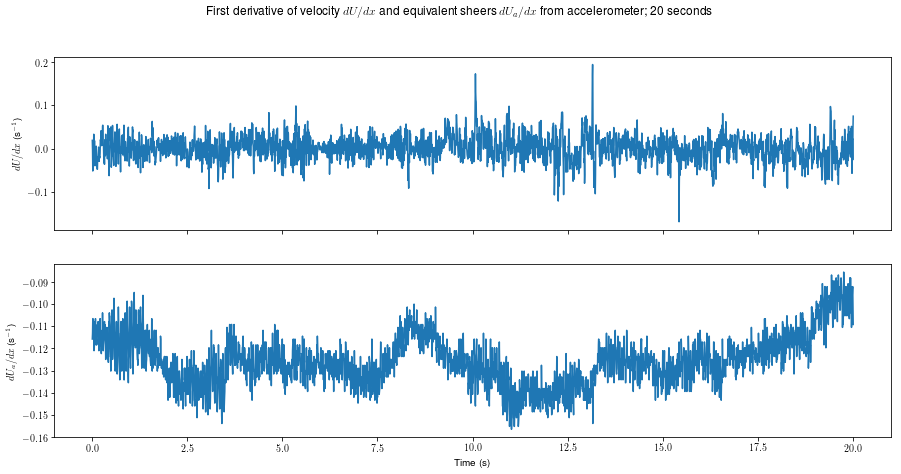

In [138]:
# slice off data for the first twenty seconds only
t20 = t_data[np.where(t_data <= time)]
s20 = s_data[np.where(t_data <= time)]
ac20 = ac_data[np.where(t_data <= time)]

# make the plot
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
ax1.plot(t20, s20)
ax1.set_ylabel(r'$dU/dx$ (s$^{-1}$)')
ax2.plot(t20, ac20)
ax2.set_ylabel(r'$dU_a/dx$ (s$^{-1}$)')
ax2.set_xlabel(r'Time (s)')
fig.set_figwidth(15)
fig.set_figheight(7)
fig.suptitle(r'First derivative of velocity $dU/dx$ and equivalent sheers $dU_a/dx$ from accelerometer; 20 seconds')

This figure shows the first derivative of velocity $dU/dx$ as a function of time on the top panel, and the equivalent sheers $dU_a/dx$ recorded by the accelerometer on the bottom. They share an x-axis for ease of comparison. 


In the top panel, the data appears close to white noise; if there is a signal, it is at a high frquency and difficult to pick out from the background at this stage. There doesn't seem to be much low-frequency variation, just a fairly constant signal centered on 0 with a significant amount of statistical noise. There are a few peaks, but it is unclear whether these are statistically significant.


The bottom panel has a clear pattern of lower frequency. There are still smaller spikes present, and it is not clear to what degree these are signal rather than background. This signal is no longer centered on 0, but a bit below it.

# Question 2

Compare the power spectra of the two signals, averaged for the whole data set (i.e. compute periodigrams). Use fft lengths of $n_{fft} = 64, 256, 2560, 24000$. Deal with the fact that the number of data points is not necessarily a multiple of $n_{fft}$ in some reasonable fashion.

In [139]:
# what's the sampling frequency?
fs = 1/(t_data[1] - t_data[0])

In [140]:
s_perios = []
ac_perios = []

for i in range(0, len(nfft)):
    # deal with the lack of divisibility by chopping off the end of the experiment
    remainder = len(t20) % nfft[i]
    # make sure it's not too much
    print('nfft = {}: chopping off {}% of the data'.format(nfft[i], remainder / len(t20) * 100))
    t_chop = t20[:(len(t20)-remainder)]
    s_chop = s20[:(len(t20)-remainder)]
    ac_chop = ac20[:(len(t20)-remainder)]
     
    # compute periodograms
    s_perios.append(signal.periodogram(s20, nfft=nfft[i], fs=fs))
    ac_perios.append(signal.periodogram(ac20, nfft=nfft[i], fs=fs))

nfft = 64: chopping off 1.696% of the data
nfft = 256: chopping off 1.696% of the data
nfft = 2560: chopping off 18.08% of the data
nfft = 24000: chopping off 100.0% of the data


Well, that's definitely not a good sign for $n_{fft} = 24000$, but I think otherwise, things are okay. Plotting:

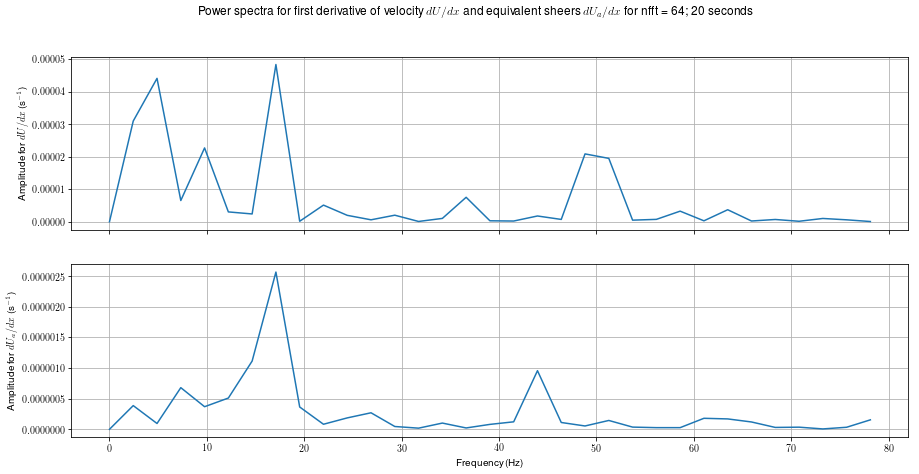

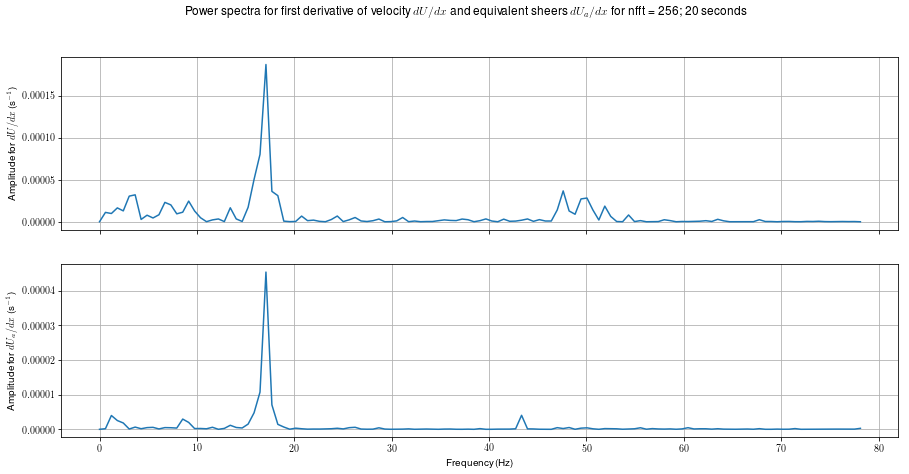

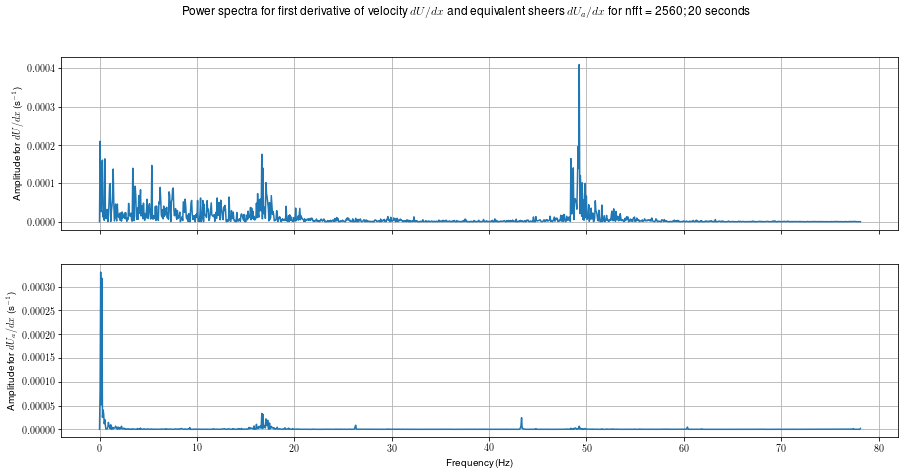

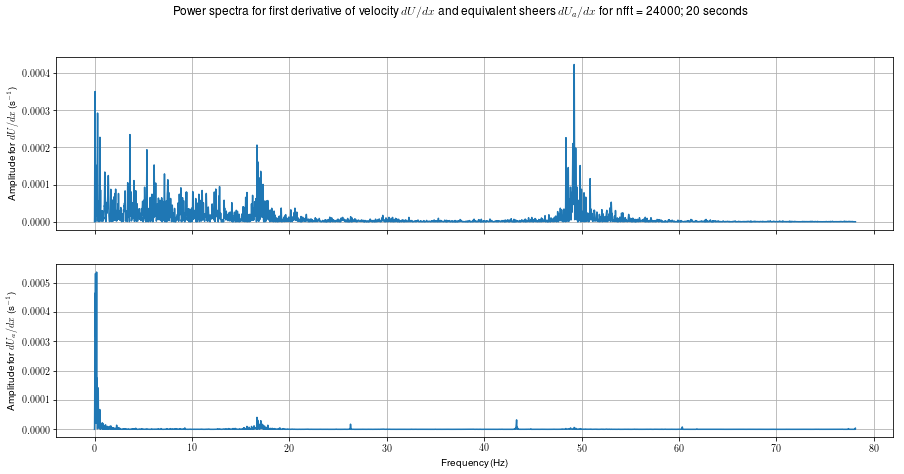

In [142]:
for i in range(0, len(nfft)):
    # plot power spectra
    fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
    ax1.plot(s_perios[i][0], s_perios[i][1])
    ax1.set_ylabel(r'Amplitude for $dU/dx$ (s$^{-1}$)')
    ax1.grid(True)
    ax2.plot(ac_perios[i][0], ac_perios[i][1])
    ax2.set_ylabel(r'Amplitude for $dU_a/dx$ (s$^{-1}$)')
    ax2.set_xlabel(r'Frequency (Hz)')
    ax2.grid(True)
    fig.set_figwidth(15)
    fig.set_figheight(7)
    fig.suptitle(r'Power spectra for first derivative of velocity $dU/dx$ and equivalent sheers $dU_a/dx$ for nfft = {}; 20 seconds'.format(nfft[i]))

Comparison:

For all values of $n_{fft}$, there is a clear spike around 17 Hz for both datasets, although it has a much larger amplitude in the top panel, which corresponds to the first derivative of velocity $dU/dx$. This dataset also displays a peak around 50 Hz, and it seems to exhibit a greater degree of low-frequency noise than the other dataset. The dataset of equivalent sheers $dU_a/dx$ on the bottom panel also displays a smaller peak centered around 43 Hz. 

# Question 3

Subsample the shear data by a factor of 10 (i.e. make a new time series using every 10th data point) and take a power spectra with nfft = 256 and compare with the power spectra of the full data set with nfft = 2560. Calculate the variance from each spectra and from the raw time series. Does the variance change? Why or why not?

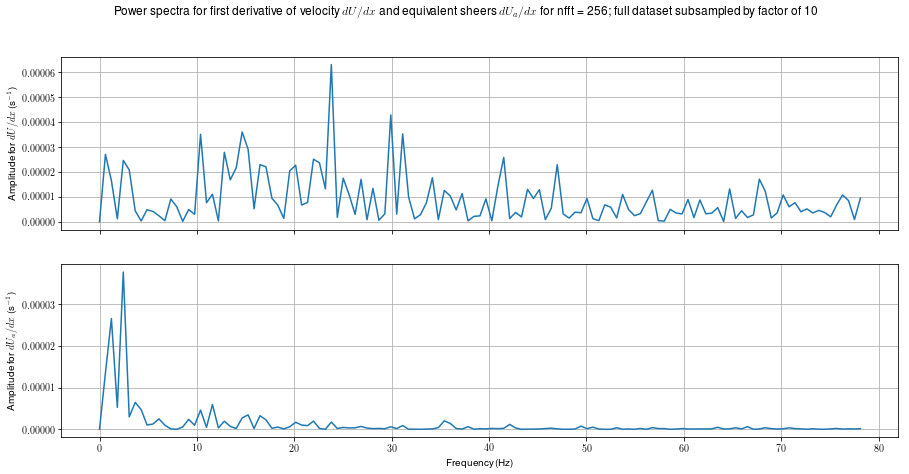

In [147]:
# subsample- slicing
s_sub = s_data[::10]
ac_sub = ac_data[::10]

# calculate periodogram
ssub_perio = signal.periodogram(s_sub, nfft=256, fs=fs)
acsub_perio = signal.periodogram(ac_sub, nfft=256, fs=fs)

# plot power spectra
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
ax1.plot(ssub_perio[0], ssub_perio[1])
ax1.set_ylabel(r'Amplitude for $dU/dx$ (s$^{-1}$)')
ax1.grid(True)
ax2.plot(acsub_perio[0], acsub_perio[1])
ax2.set_ylabel(r'Amplitude for $dU_a/dx$ (s$^{-1}$)')
ax2.set_xlabel(r'Frequency (Hz)')
ax2.grid(True)
fig.set_figwidth(15)
fig.set_figheight(7)
fig.suptitle(r'Power spectra for first derivative of velocity $dU/dx$ and equivalent sheers $dU_a/dx$ for nfft = 256; full dataset subsampled by factor of 10')

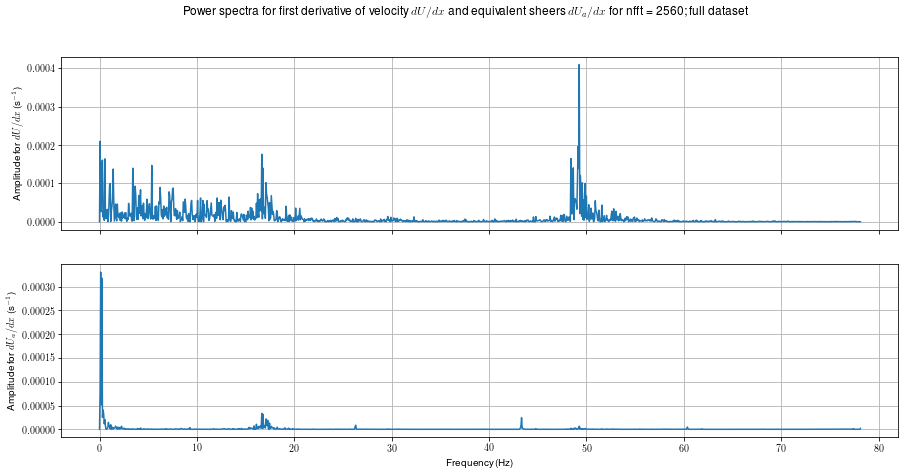

In [148]:
# use full dataset this time
# calculate periodogram
sfull_perio = signal.periodogram(s_data, nfft=2560, fs=fs)
acfull_perio = signal.periodogram(ac_data, nfft=2560, fs=fs)

# plot power spectra
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
ax1.plot(sfull_perio[0], sfull_perio[1])
ax1.set_ylabel(r'Amplitude for $dU/dx$ (s$^{-1}$)')
ax1.grid(True)
ax2.plot(acfull_perio[0], acfull_perio[1])
ax2.set_ylabel(r'Amplitude for $dU_a/dx$ (s$^{-1}$)')
ax2.set_xlabel(r'Frequency (Hz)')
ax2.grid(True)
fig.set_figwidth(15)
fig.set_figheight(7)
fig.suptitle(r'Power spectra for first derivative of velocity $dU/dx$ and equivalent sheers $dU_a/dx$ for nfft = 2560; full dataset')

Comparison:

Using the full dataset gives much more apparent results. The subsampled dataset produced a power spectrum in which it is difficult to distinguish signal from noise, especially for $dU/dx$.

Now I'll calculate variances.

In [154]:
# calculate variances
# subsampled by factor of 10, nfft=256
var_ssub = np.var(ssub_perio[1])
var_acsub = np.var(acsub_perio[1])
# full data set, nfft=2560
var_sfull = np.var(sfull_perio[1])
var_acfull = np.var(acfull_perio[1])
# raw time series
var_sraw = np.var(s_data)
var_acraw = np.var(ac_data)

print('subsampled by factor of 10, nfft=256:\ns variance = {} s^-2\nac variance = {} s^-2\n'.format(var_ssub, var_acsub))
print('full dataset, nfft=2560:\ns variance = {} s^-2\nac variance = {} s^-2\n'.format(var_sfull, var_acfull))
print('raw time series:\ns variance = {} s^-2\nac variance = {} s^-2\n'.format(var_sraw, var_acraw))

subsampled by factor of 10, nfft=256:
s variance = 1.0108597117600786e-10
ac variance = 1.814711201447525e-11

full dataset, nfft=2560:
s variance = 6.145843627236127e-10
ac variance = 1.775291742592392e-10

raw time series:
s variance = 0.0023982981542625013
ac variance = 0.0010867773231812284



 * Does the variance change? Why or why not?

The variance changes very slightly, but on the order of magnitude of $10^{-10}$. It is close enough that we can reasonably consider the change negligible, which makes sense because in subsampling the data, we should not be changing the over-all shape of the time-series very much, only reducing its resolution.

# Question 4
Redo the subsampling from above, but this time smooth the data first to something close to 10 samples and then subsample. Compare the spectra and the variances.

In [167]:
# smooth the data
def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError("smooth only accepts 1 dimension arrays.")
        if x.size < window_len:
                raise ValueError("Input vector needs to be bigger than window size.")
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

        s=np.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        
        if window == 'flat':  # moving average
                w=np.ones(window_len,'d')
        else:  
                w=eval('np.'+window+'(window_len)')

        y=np.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

s_datasmooth = smooth(s_data, window_len=len(s_data/10))
ac_datasmooth = smooth(ac_data, window_len=len(ac_data/10))

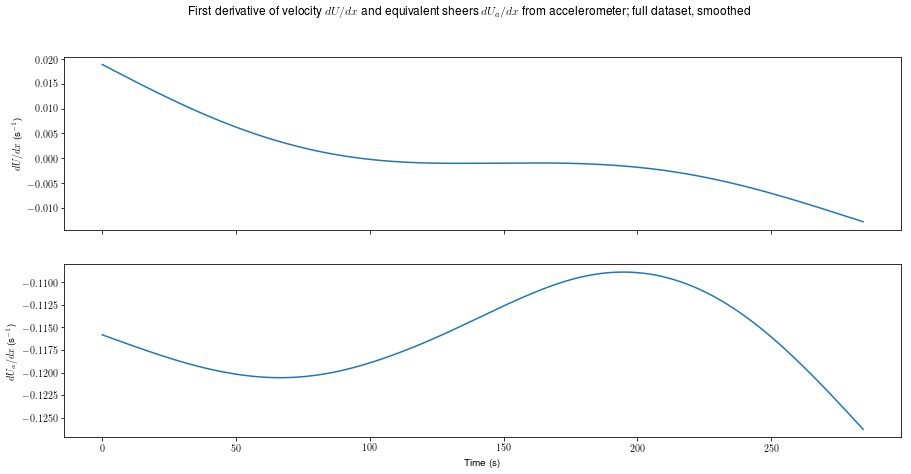

In [169]:
# look at the smoothed time series
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
ax1.plot(t_data, s_datasmooth)
ax1.set_ylabel(r'$dU/dx$ (s$^{-1}$)')
ax2.plot(t_data, ac_datasmooth)
ax2.set_ylabel(r'$dU_a/dx$ (s$^{-1}$)')
ax2.set_xlabel(r'Time (s)')
fig.set_figwidth(15)
fig.set_figheight(7)
fig.suptitle(r'First derivative of velocity $dU/dx$ and equivalent sheers $dU_a/dx$ from accelerometer; full dataset, smoothed')

Wow, that is very smooth. It would probably have been better to use a smaller smoothing window length, but this is what needed to be done to get it smoothed to 10 samples.

In [170]:
# subsample again
s_subsmooth = s_datasmooth[::10]
ac_subsmooth = ac_datasmooth[::10]

In [171]:
# calculate periodogram
ssmooth_perio = signal.periodogram(s_datasmooth, nfft=256, fs=fs)
acsmooth_perio = signal.periodogram(ac_datasmooth, nfft=256, fs=fs)

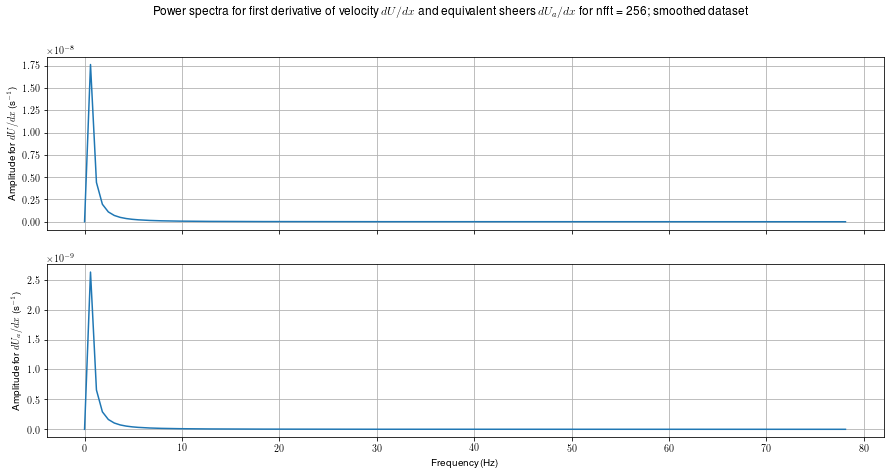

In [172]:
# plot power spectra
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
ax1.plot(ssmooth_perio[0], ssmooth_perio[1])
ax1.set_ylabel(r'Amplitude for $dU/dx$ (s$^{-1}$)')
ax1.grid(True)
ax2.plot(acsmooth_perio[0], acsmooth_perio[1])
ax2.set_ylabel(r'Amplitude for $dU_a/dx$ (s$^{-1}$)')
ax2.set_xlabel(r'Frequency (Hz)')
ax2.grid(True)
fig.set_figwidth(15)
fig.set_figheight(7)
fig.suptitle(r'Power spectra for first derivative of velocity $dU/dx$ and equivalent sheers $dU_a/dx$ for nfft = 256; smoothed dataset')

In [179]:
# calculate variance
var_ssmooth = np.var(s_datasmooth)
var_acsmooth = np.var(ac_datasmooth)

print('Variance for smoothed s data: {} s^-2\nVariance for smoothed ac data: {} s^-2'.format(var_ssmooth, var_acsmooth))

Variance for smoothed s data: 4.612660158393085e-05 s^-2
Variance for smoothed ac data: 1.967616837885846e-05 s^-2


I believe that the data was smoothed too much, causing the spectra to look excessively smooth. The $ac$ and $s$ data both decrease until about 75 seconds in, at which point $ac$ begins to increase. They are centered on different values. We see that the variance for the smoothed $ac$ data is slightly smaller than the variance for the smoothed $s$ data, but overall they are of the same order of magnitude and more-or-less comparable.

# Question 5
Plot and describe the differences (in a few sentences) between the spectra of dat.s from an “active” time (200 to 250 s) to a “quiet time” (50 to 100 s).

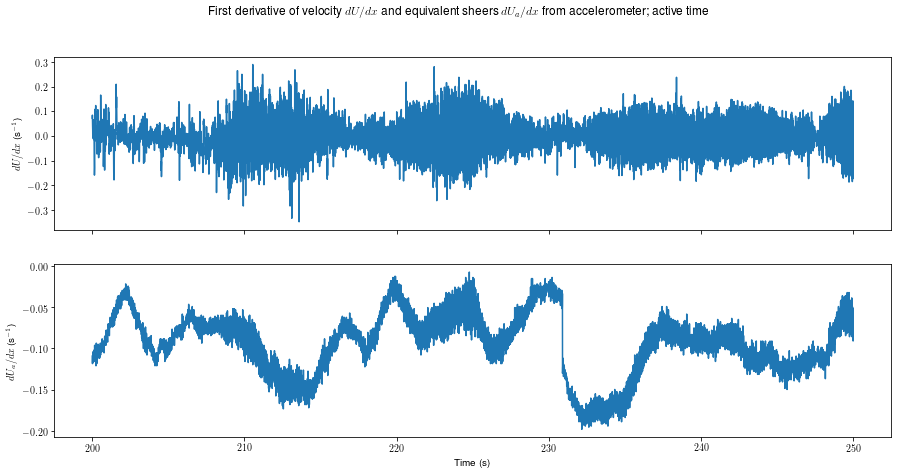

In [191]:
# plot active time

# slice off data for the first twenty seconds only
idx = np.where((t_data>200) & (t_data<250))
t_active = t_data[idx]
s_active = s_data[idx]
ac_active = ac_data[idx]

# make the plot
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
ax1.plot(t_active, s_active)
ax1.set_ylabel(r'$dU/dx$ (s$^{-1}$)')
ax2.plot(t_active, ac_active)
ax2.set_ylabel(r'$dU_a/dx$ (s$^{-1}$)')
ax2.set_xlabel(r'Time (s)')
fig.set_figwidth(15)
fig.set_figheight(7)
fig.suptitle(r'First derivative of velocity $dU/dx$ and equivalent sheers $dU_a/dx$ from accelerometer; active time')

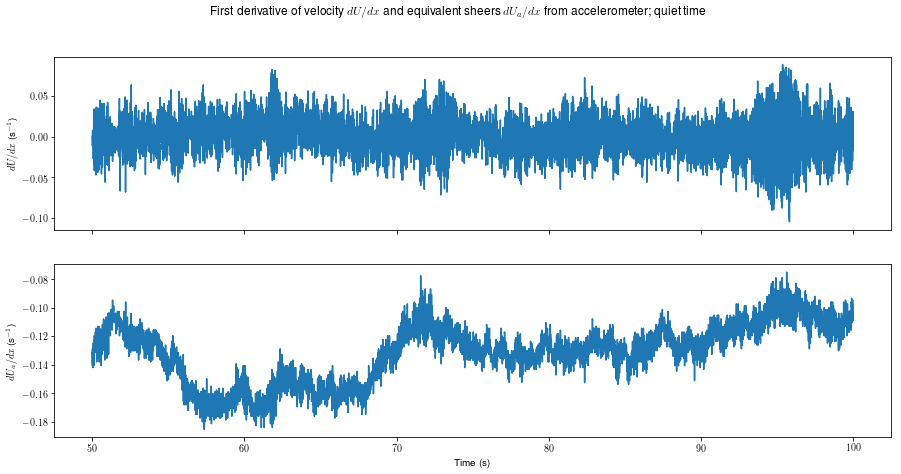

In [193]:
# plot quiet time

# slice off data for the first twenty seconds only
idx = np.where((t_data>50) & (t_data<100))
t_quiet = t_data[idx]
s_quiet = s_data[idx]
ac_quiet = ac_data[idx]

# make the plot
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
ax1.plot(t_quiet, s_quiet)
ax1.set_ylabel(r'$dU/dx$ (s$^{-1}$)')
ax2.plot(t_quiet, ac_quiet)
ax2.set_ylabel(r'$dU_a/dx$ (s$^{-1}$)')
ax2.set_xlabel(r'Time (s)')
fig.set_figwidth(15)
fig.set_figheight(7)
fig.suptitle(r'First derivative of velocity $dU/dx$ and equivalent sheers $dU_a/dx$ from accelerometer; quiet time')

In the active time, the $s$ data shows a periodicity in amplitude which looks almost like a beat wave, which arises from summing waves of high and low frequencies. This is not apparent in the $s$ data from the quiet time. In both cases, $s$ appears to be centered on 0. 

For the $ac$ data, significantly more jumps and dips are present in the active region than in the quiet region. While not linear in the quiet time, it is much closer to it than in the other region.

# Question 6
For the two time periods above, estimate the coherence between the dat.ac signal and the dat.s signal. Which is more coherent - the “active” or “inactive” region? (HINT: remember that you need more than one degree of freedom to do this properly).

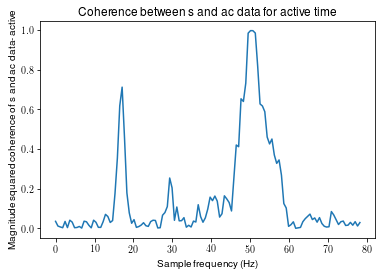

In [207]:
# for active time 
active_coher = signal.coherence(s_active, ac_active, fs=fs)  # defaults to 50% overlap, hanning window

# make the plot
plt.plot(active_coher[0], active_coher[1])
plt.ylabel(r'Magnitude squared coherence of s and ac data- active')
plt.xlabel(r'Sample frequency (Hz)')
plt.title(r'Coherence between s and ac data for active time')

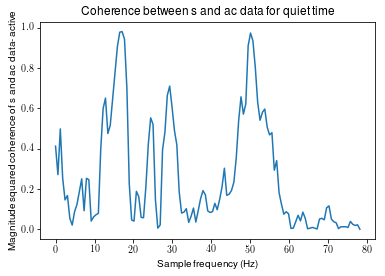

In [208]:
# for active time 
quiet_coher = signal.coherence(s_quiet, ac_quiet, fs=fs)  # defaults to 50% overlap, hanning window

# make the plot
plt.plot(quiet_coher[0], quiet_coher[1])
plt.ylabel(r'Magnitude squared coherence of s and ac data- active')
plt.xlabel(r'Sample frequency (Hz)')
plt.title(r'Coherence between s and ac data for quiet time')

In the active region, there is a peak in coherence at around 50 Hz, and another smaller peak around 17 Hz. For the quiet region, there are large peaks around 50 and 17 Hz, but there are also smaller peaks arounf 25 and 30 Hz. It is difficult to determine from these plots alone which is more coherent, so I will try calculating the median coherence  for each in order to quantitiatively decide.

In [211]:
med_coher_active = np.median(active_coher[1])
med_coher_quiet = np.median(quiet_coher[1])

print('Median coherence for quiet region: {}\n and for active region: {}'.format(med_coher_quiet, med_coher_active))

Median coherence for quiet region: 0.14750834323293766
 and for active region: 0.04099878254650818


So we see that the quiet region shows a somewhat higher median coherence.